<a href="https://colab.research.google.com/github/jyotiraj-code/dissertation/blob/main/Working_QFT_using_Tensor_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
!pip install quimb --quiet

In [8]:
!pip install -U git+https://github.com/jcmgray/quimb.git

  Cloning https://github.com/jcmgray/quimb.git to /tmp/pip-req-build-enfrbwzq
  Running command git clone --filter=blob:none --quiet https://github.com/jcmgray/quimb.git /tmp/pip-req-build-enfrbwzq
  Resolved https://github.com/jcmgray/quimb.git to commit 7cd4f4af8a9b4aa94d847d698e1060a1a0a37633
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [9]:
%config InlineBackend.figure_formats = ['svg']
import quimb as qu
import quimb.tensor as qtn
import numpy as np
from math import pi

In [ ]:
# Defining the QFT Rotations
def qft_rotations(circuit, n):
    for qubit in range(n):
        circuit.apply_gate("H", qubit, gate_round=None)
        for j in range(qubit + 1, n):
            circuit.apply_gate('CPHASE', lamda=pi/2**(j - qubit), i=qubit, j=j)
    return circuit

n = 4
qc = qtn.Circuit(n)
qft_rotations(qc, n)
qc.psi.draw()

IndexError: index 0 is out of bounds for axis 0 with size 0

## Applying the general QFT Function

Applying the to_dense method to get the dense column vector representation

[[0.176777-2.710852e-17j]
 [0.176777-1.489807e-17j]
 [0.176777-2.201423e-17j]
 [0.176777-3.380302e-17j]
 [0.176777-5.615844e-18j]
 [0.176777+6.594614e-18j]
 [0.176777+2.072528e-18j]
 [0.176777-9.716259e-18j]
 [0.176777-1.163753e-17j]
 [0.176777+5.729334e-19j]
 [0.176777-6.543232e-18j]
 [0.176777-1.833202e-17j]
 [0.176777+9.855155e-18j]
 [0.176777+2.206561e-17j]
 [0.176777+1.754353e-17j]
 [0.176777+5.754741e-18j]
 [0.176777-2.710852e-17j]
 [0.176777-1.489807e-17j]
 [0.176777-2.201423e-17j]
 [0.176777-3.380302e-17j]
 [0.176777-5.615844e-18j]
 [0.176777+6.594614e-18j]
 [0.176777+2.072528e-18j]
 [0.176777-9.716259e-18j]
 [0.176777-1.163753e-17j]
 [0.176777+5.729334e-19j]
 [0.176777-6.543232e-18j]
 [0.176777-1.833202e-17j]
 [0.176777+9.855155e-18j]
 [0.176777+2.206561e-17j]
 [0.176777+1.754353e-17j]
 [0.176777+5.754741e-18j]]

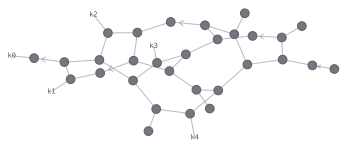

None

In [4]:
import numpy as np
import quimb.tensor as qtn

# Function to apply QFT rotations
def qft_rotations(circuit, qubits):
    for i in range(len(qubits)):
        circuit.apply_gate('H', qubits[i])
        for j in range(i+1, len(qubits)):
            lamda = np.pi / 2**(j - i)
            circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])

# Function to apply the QFT to the circuit
def qft(circuit, qubits):
    qft_rotations(circuit, qubits)
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])

# Number of qubits
n = 5

# Create a quantum circuit with n qubits
qc = qtn.Circuit(n)

# Apply the QFT to the entire circuit
qft(qc, range(n))
#Applying the Dense Matrix representation
display(qc.to_dense())
# Visualize the tensor network
display(qc.psi.draw())




To apply the amplitude method to get the amplitude of the states and then check are these have the same values:

[(0.17677669529663625-2.453269466693393e-18j), (0.17677669529663648-1.2266347333467007e-18j), (0.17677669529663642+4.906538933386783e-18j), (0.17677669529663664+6.133173666733486e-18j), (0.17677669529663637+1.7172886266853737e-17j), (0.1767766952966366+1.8399521000200456e-17j), (0.17677669529663653+2.4532694666933934e-17j), (0.17677669529663675+2.5759329400280665e-17j), (0.17677669529663628+7.359808400080169e-18j), (0.1767766952966365+8.586443133426873e-18j), (0.17677669529663645+1.4719616800160353e-17j), (0.17677669529663667+1.5946251533507068e-17j), (0.1767766952966364+2.6985964133627312e-17j), (0.17677669529663662+2.821259886697404e-17j), (0.17677669529663656+3.434577253370752e-17j), (0.17677669529663678+3.5572407267054264e-17j), (0.17677669529663625-2.453269466693393e-18j), (0.17677669529663648-1.2266347333467007e-18j), (0.17677669529663642+4.906538933386783e-18j), (0.17677669529663664+6.133173666733486e-18j), (0.17677669529663637+1.7172886266853737e-17j), (0.1767766952966366+1.839

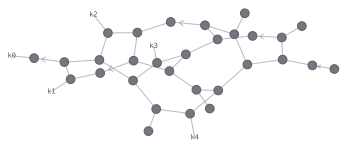

None

In [10]:
import numpy as np
import quimb.tensor as qtn

# Function to apply QFT rotations
def qft_rotations(circuit, qubits):
    for i in range(len(qubits)):
        circuit.apply_gate('H', qubits[i])
        for j in range(i+1, len(qubits)):
            lamda = np.pi / 2**(j - i)
            circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])

# Function to apply the QFT to the circuit
def qft(circuit, qubits):
    qft_rotations(circuit, qubits)
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])

# Number of qubits
n = 5

# Create a quantum circuit with n qubits
qc = qtn.Circuit(n)

# Apply the QFT to the entire circuit
qft(qc, range(n))

#To apply the amplitude methods (First getting the bitstrings, Second getting amplitudes corresponding to that state, Third storing them in a list)
bit_strings = [format(i, '05b') for i in range(32)]
amps = []

for states in bit_strings:
    amp = qc.amplitude(states)
    amps.append(amp)

# Print the amplitudes
print(amps)
# Visualize the tensor network
display(qc.psi.draw())




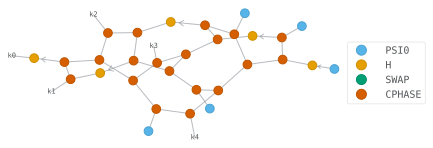

In [5]:
qc.psi.draw(color=['PSI0', 'H', 'SWAP', 'CPHASE'])

In [6]:
#qc.psi['CPHASE']

Suppose I want to apply it in a particular state:

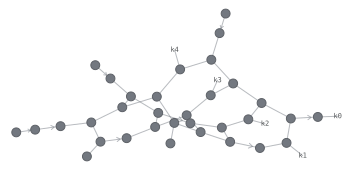

In [ ]:
# Function to apply QFT rotations
def qft_rotations(circuit, qubits):
    for i in range(len(qubits)):
        circuit.apply_gate('H', qubits[i])
        for j in range(i + 1, len(qubits)):
            lamda = np.pi / 2**(j - i)
            circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])

# Function to apply the QFT to the circuit
def qft(circuit, qubits):
    qft_rotations(circuit, qubits)
    for i in range(len(qubits) // 2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits) - i - 1])

# Number of qubits
n = 5

# Create a quantum circuit with n qubits
qc = qtn.Circuit(n)

# Prepare the quantum state |10101>
initial_state = '10101'
for i, bit in enumerate(initial_state):
    if bit == '1':
        qc.apply_gate('X', i)

# Apply the QFT to the entire circuit
qft(qc, range(n))

# Visualize the tensor network (optional)
qc.psi.draw()

[0.031249999999999778, 0.031249999999999858, 0.031249999999999837, 0.031249999999999917, 0.031249999999999816, 0.031249999999999896, 0.031249999999999875, 0.031249999999999955, 0.03124999999999979, 0.031249999999999868, 0.031249999999999847, 0.031249999999999927, 0.031249999999999827, 0.031249999999999906, 0.031249999999999886, 0.031249999999999965, 0.031249999999999778, 0.031249999999999858, 0.031249999999999837, 0.031249999999999917, 0.031249999999999816, 0.031249999999999896, 0.031249999999999875, 0.031249999999999955, 0.03124999999999979, 0.031249999999999868, 0.031249999999999847, 0.031249999999999927, 0.031249999999999827, 0.031249999999999906, 0.031249999999999886, 0.031249999999999965]


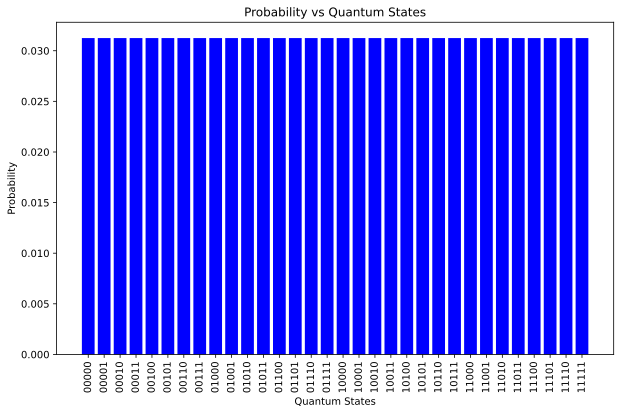

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bit_strings = [format(i, '05b') for i in range(32)]
amps = []
probs = []

for amplitudes in bit_strings:
    amp = qc.amplitude(amplitudes)
    amps.append(amp)
    probs.append(np.abs(amp)**2)

# Print the probabilities
print(probs)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bit_strings, probs, color='blue')
plt.xlabel('Quantum States')
plt.ylabel('Probability')
plt.title('Probability vs Quantum States')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

## Following code applies the Inverse QFT Function

In [ ]:
# Function to apply the QFT to the circuit
def qft(circuit, qubits):
    qft_rotations(circuit, qubits)
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])

# Function to apply the inverse QFT rotations
def inverse_qft_rotations(circuit, qubits):
    for i in reversed(range(len(qubits))):
        for j in range(i+1, len(qubits)):
            lamda = -np.pi / 2**(j - i)  # Negate the angle for inverse
            circuit.apply_gate('CPHASE', lamda, qubits[i], qubits[j])
        circuit.apply_gate('H', qubits[i])

# Function to apply the inverse QFT to the circuit
def inverse_qft(circuit, qubits):
    for i in range(len(qubits)//2):
        circuit.apply_gate('SWAP', qubits[i], qubits[len(qubits)-i-1])
    inverse_qft_rotations(circuit, qubits)

# Number of qubits
n = 5

# Create a quantum circuit with n qubits
qc = qtn.Circuit(n)

# Apply the QFT to the entire circuit
qft(qc, range(n))

# Apply the inverse QFT to the entire circuit
inverse_qft(qc, range(n))

[0.9999999999999931, 0.0, 5.060215755171997e-33, 0.0, 1.8923611946975099e-31, 0.0, 9.575755931884506e-64, 0.0, 3.135366687009049e-31, 0.0, 1.586563190784473e-63, 0.0, 5.933246249643257e-62, 0.0, 3.002350615176018e-94, 0.0, 1.4679498590818769e-30, 0.0, 7.428143004728677e-63, 0.0, 2.77789134908824e-61, 0.0, 1.405672957081241e-93, 0.0, 4.602561086364975e-61, 0.0, 2.328995212336575e-93, 0.0, 8.709707996061956e-92, 0.0, 4.407300162462054e-124, 0.0]


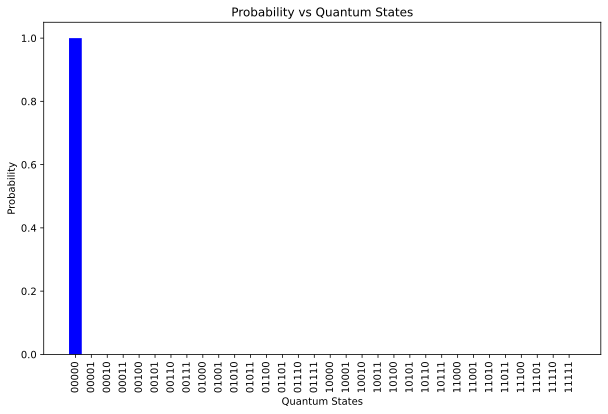

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

bit_strings = [format(i, '05b') for i in range(32)]
amps = []
probs = []

for amplitudes in bit_strings:
    amp = qc.amplitude(amplitudes)
    amps.append(amp)
    probs.append(np.abs(amp)**2)

# Print the probabilities
print(probs)

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(bit_strings, probs, color='blue')
plt.xlabel('Quantum States')
plt.ylabel('Probability')
plt.title('Probability vs Quantum States')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()